question 1

Write a function to generate an m+1 dimensional data set, of size n, consisting of m continuous independent
variables (X) and one dependent binary variable (Y) defined as
Y =
(
1 if p(y = 1|~x) = 1
1+exp−~x.β~ > 0.5
0 otherwise
where,
• β is a random vector of dimensionality m + 1, representing the coefficients of the linear relationship
between X and Y, and
• ∀i ∈ [1, n], xi0 = 1
To add noise to the labels (Y) generated, we assume a Bernoulli distribution with probability of success, θ,
that determines whether or not the label generated, as above, is to be flipped. The larger the value of θ, the
greater is the noise.
The function should take the following parameters:
• θ: The probability of flipping the label, Y
• n: The size of the data set
• m: The number of indepedent variables
Output from the function should be:
• X: An n × m numpy array of independent variable values (with a 1 in the first column)
• Y : The n × 1 binary numpy array of output values
• β: The random coefficients used to generate Y from X

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(theta,n,m):
  # for generating value of X
  x_ones=np.ones((n,1))       #for generating ones in the first column 
  x_rand=np.random.randn(n,m)  #for generating random number
  X=np.concatenate((x_ones,x_rand),axis=1)      # concatenating ones and random number 

  #generating beta 
  beta=np.random.randn(m+1,1)

  #generating value of Y
  l=np.exp(-(np.dot(X,beta)))
  sigmoid=(1/(1+l))

  Y=sigmoid>0.5
  Y=Y.astype(int)

  #noise 
  noise=np.random.binomial(1,theta,n)        #np.random.binomial(n=1,p=theta,size=n)
  noise=noise.reshape(n,1)

  Y=Y+noise
  Y %=2 
  return X,Y,beta

X,Y,beta=generate_data(0.3,10000,5)

question 2

Write a function that learns the parameters of a logistic regression function given inputs
• X: An n × m numpy array of independent variable values
• Y : The n × 1 binary numpy array of output values
• k: the number of iteractions (epochs)
• τ : the threshold on change in Cost function value from the previous to current iteration
• λ: the learning rate for Gradient Descent
The function should implement the Gradient Descent algorithm as discussed in class that initialises β with
random values and then updates these values in each iteraction by moving in the the direction defined by
the partial derivative of the cost function with respect to each of the coefficients. The function should use
only one loop that ends after a number of iterations (k) or a threshold on the change in cost function value
(τ ).
The output should be a m + 1 dimensional vector of coefficients and the final cost function value

In [ ]:
def logistic_regression(X,Y,k,t,alpha):
  beta= np.random.randn(X.shape[1],1)
  m=X.shape[1]
  cost_prev=np.inf
  for epoches in range(k):

    #forward pass 
    l=np.exp(-(np.dot(X,beta)))
    y_hat=(1/(1+l))      #Y=sigmoid
    # cost funtion
    #when y=1 
    cost_1=np.matmul(Y.T,np.log(y_hat))
    #when y=0
    cost_2=np.matmul((1-Y).T,np.log(1-y_hat))
    #log_loss (cost function logistic regression)
    log_loss= -(cost_1+cost_2)/(2*X.shape[0])

    if abs(log_loss-cost_prev)<t:    #thresold value
            break
    cost_prev=log_loss
    
    #backward pass 
    gradient =  -np.dot(X.T,(Y-y_hat))/(X.shape[0])             #dL/dw
    beta = beta - alpha*gradient 

  return beta,log_loss[0][0]
  
logistic_regression(X,Y,1000,0.00005,0.001)

(array([[-0.81444468],
        [-0.30487286],
        [-1.16375959],
        [-0.42932344],
        [-1.40662826],
        [-0.24420699]]), 0.5564866381686646)

question 3 

Create a report investigating how differen values of n and θ impact the ability for your logistic regression
function to learn the coefficients, β, used to generate the output vector Y . Also include your derivation of
the partial derivative of the cost function with respect to the parameters of the model.

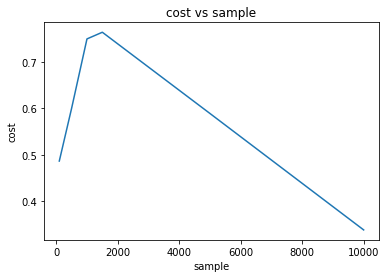

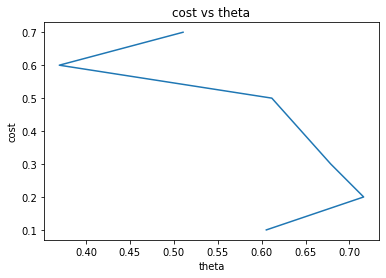

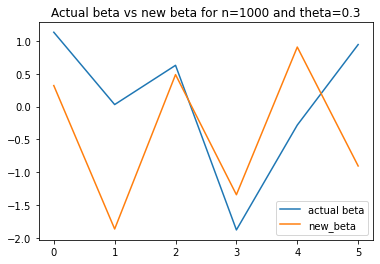

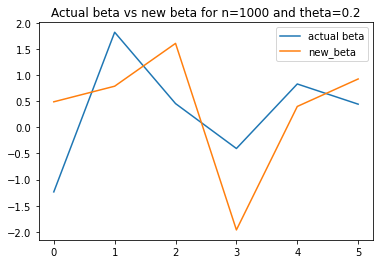

In [ ]:
n=[100,500,1000,1500,5000,10000]    #different sample values 
theta=[0.1,0.2,0.3,0.5,0.6,0.7]         #different theta values  (theta values lies between 0 and 1 as it is probability of sucess)


#plot 1
cost=[]
for i in n:
  X,Y,beta=generate_data(0.3,i,5)
  new_beta,cost_=logistic_regression(X,Y,1000,0.05,0.0001)
  cost.append(cost_)

plt.xlabel("sample")
plt.ylabel('cost')
plt.title('cost vs sample')
plt.plot(n,cost)
plt.show()
plt.close()


#plot 2
cost=[]
for i in theta:
  X,Y,beta=generate_data(i,1000,5)
  new_beta,cost_=logistic_regression(X,Y,1000,0.05,0.0001)
  cost.append(cost_)

plt.xlabel("theta")
plt.ylabel('cost')
plt.title('cost vs theta')
plt.plot(cost,theta)
plt.show()
plt.close()

#plot 3 

X,Y,beta=generate_data(0.3,1000,5)
new_beta,cost_=logistic_regression(X,Y,1000,0.05,0.0001)

plt.title('Actual beta vs new beta for n=1000 and theta=0.3')
plt.plot(beta,label="actual beta")
plt.plot(new_beta,label="new_beta")
plt.legend()
plt.show()
plt.close()

#plot 4

X,Y,beta=generate_data(0.2,1000,5)
new_beta,cost_=logistic_regression(X,Y,1000,0.05,0.0001)

plt.title('Actual beta vs new beta for n=1000 and theta=0.2')
plt.plot(beta,label="actual beta")
plt.plot(new_beta,label="new_beta")
plt.legend()
plt.show()
plt.close()


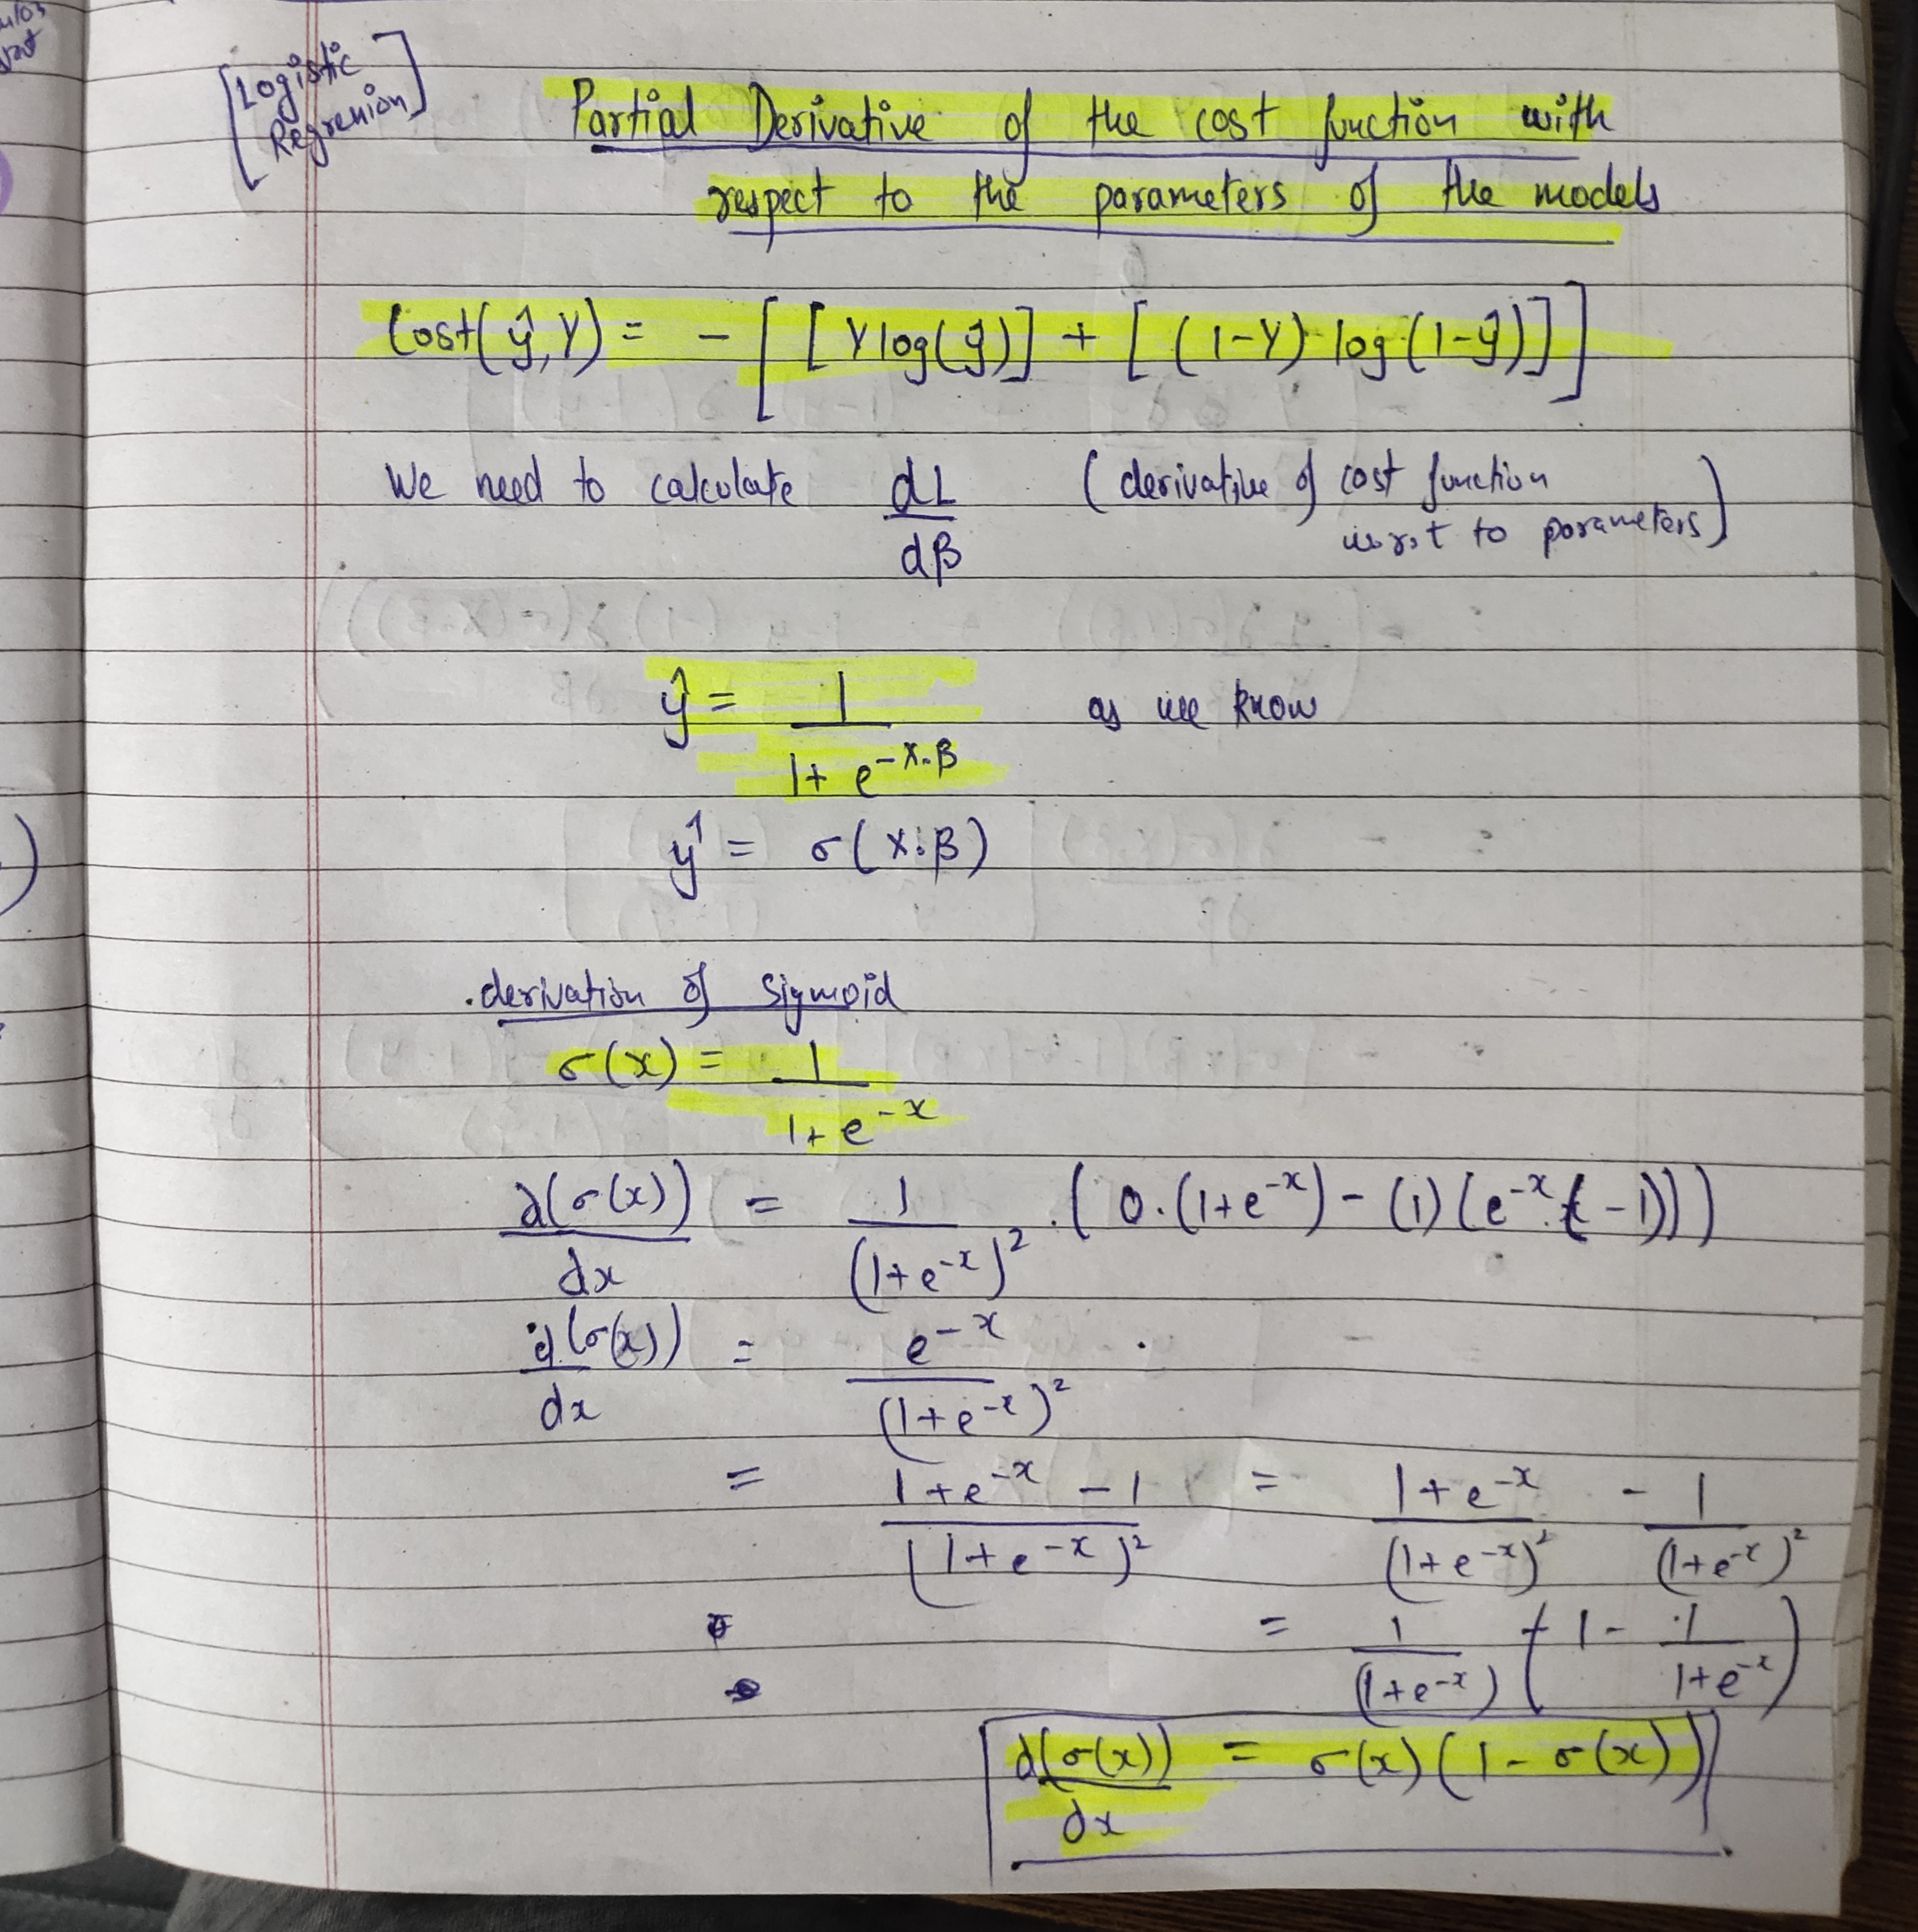

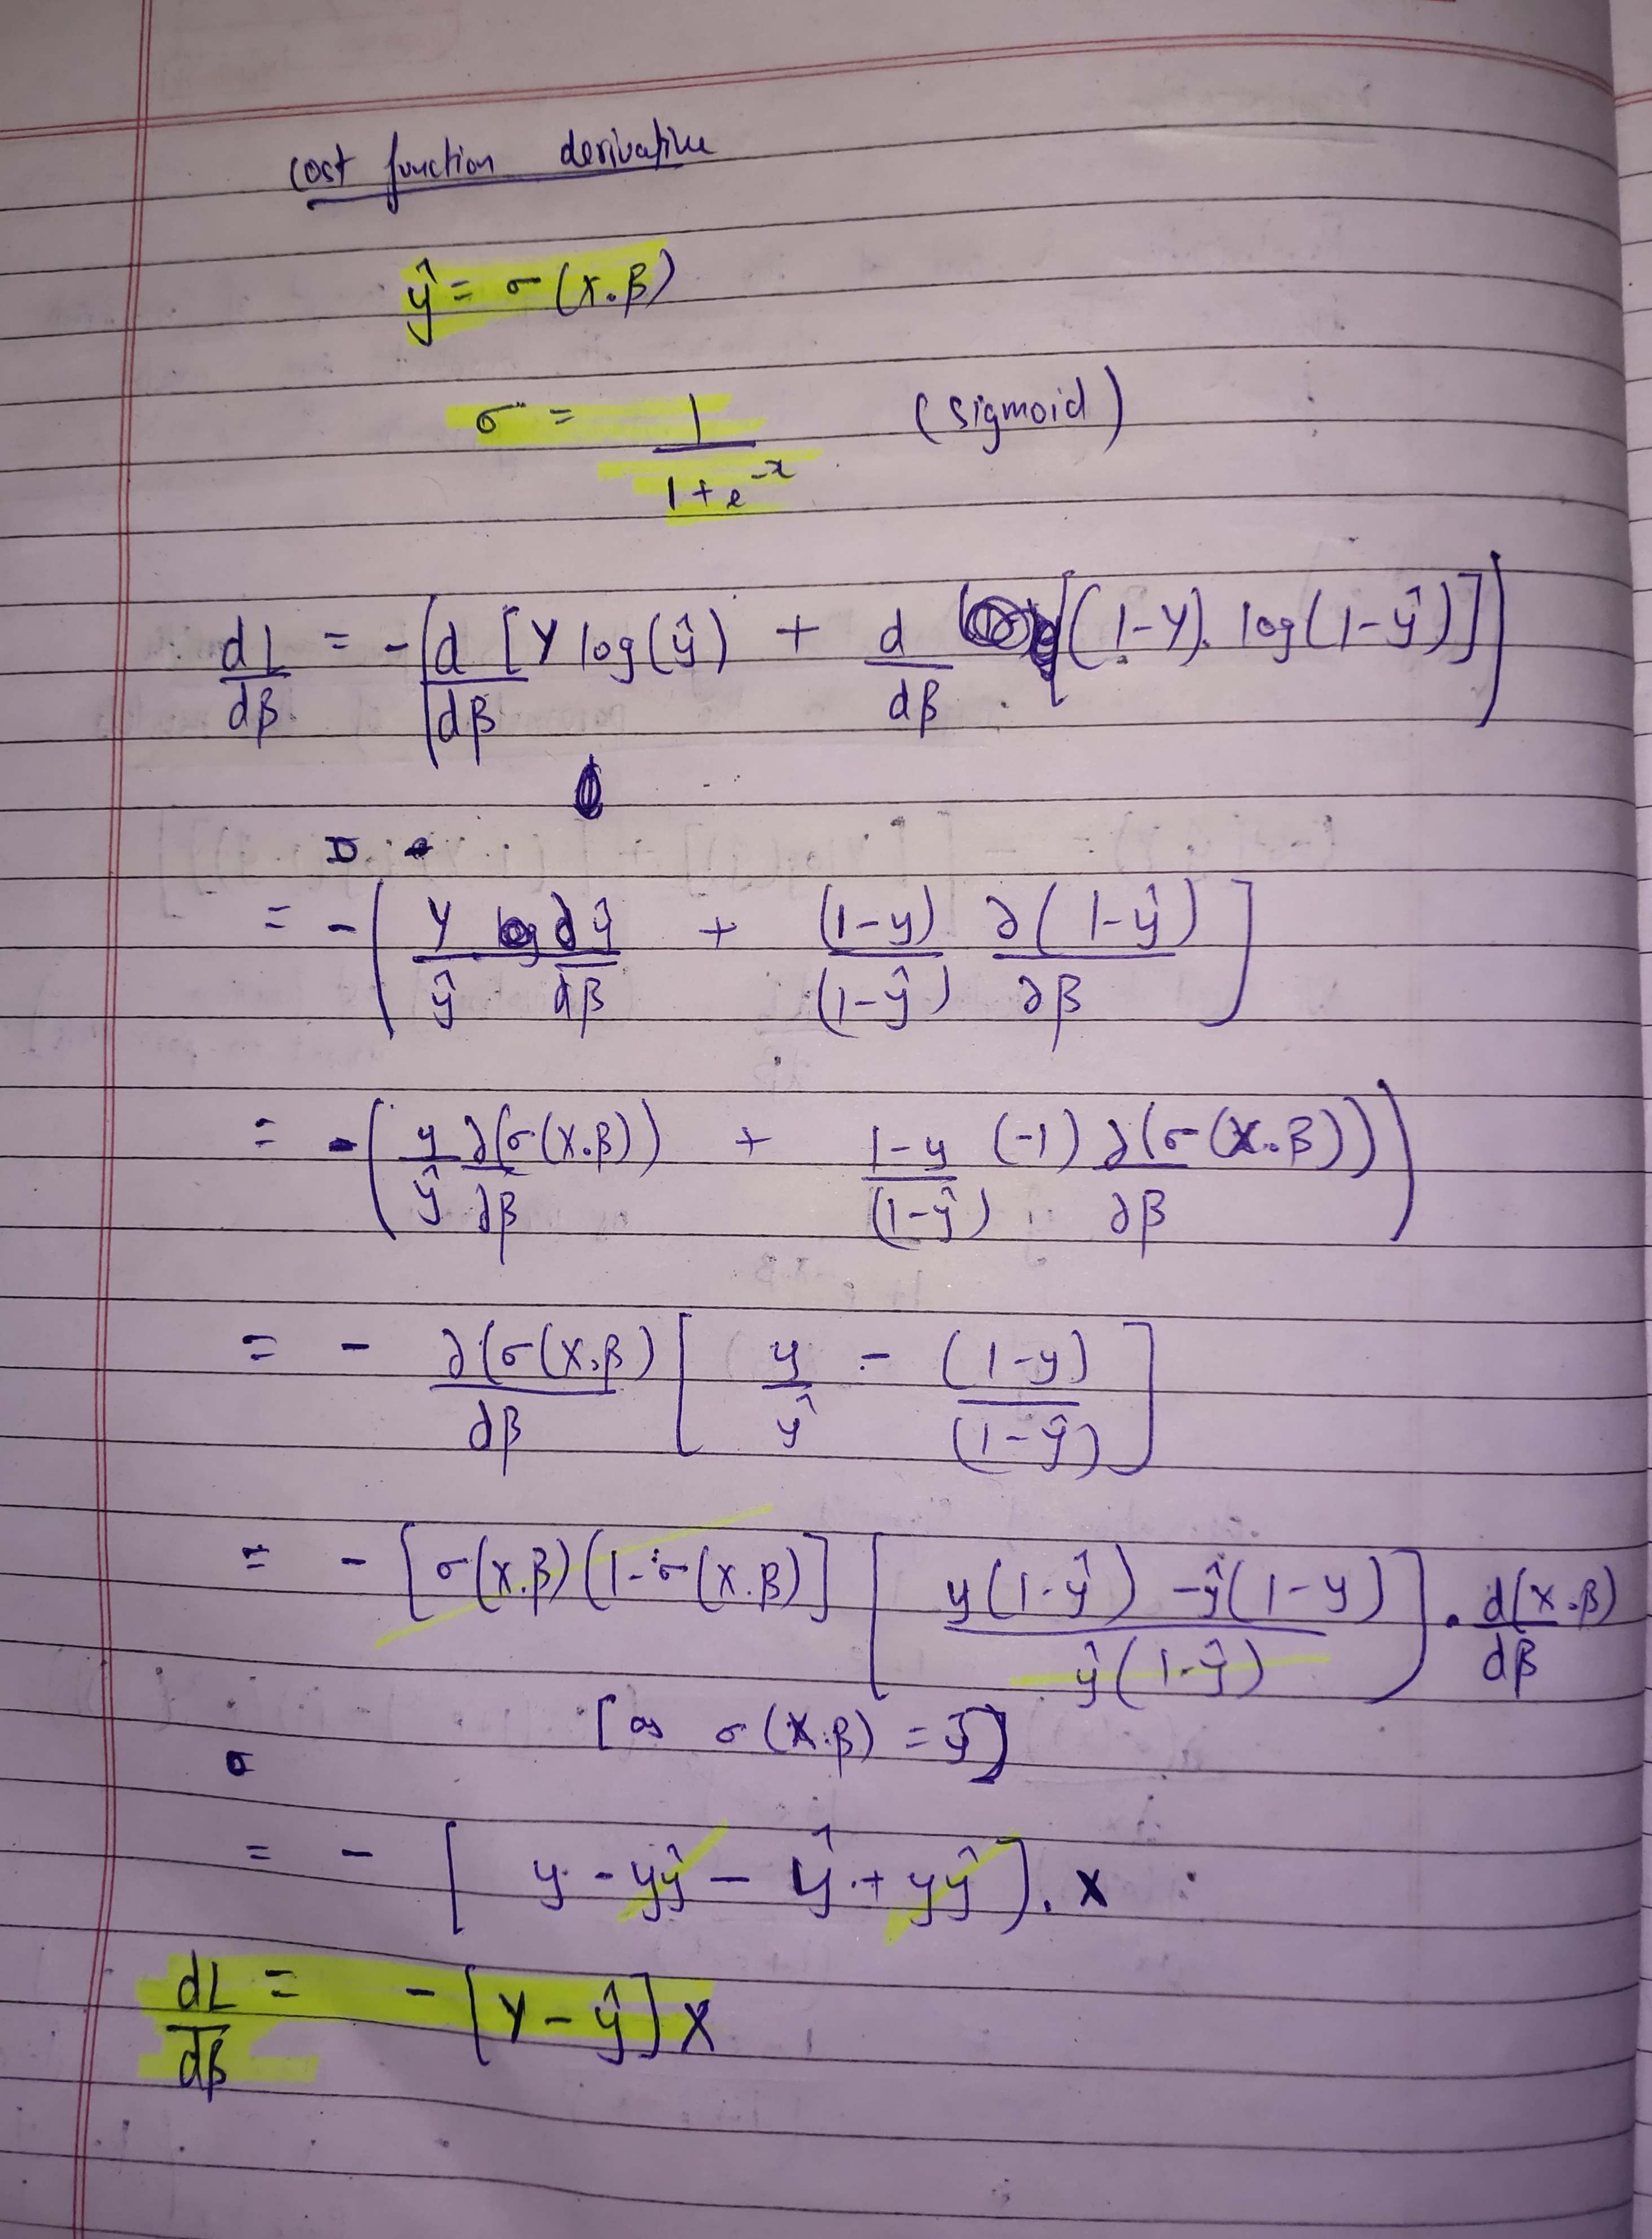

question 4 

Add L1 and L2 regularization to the Logistic Regression cost function. How does this impact the models
learnt? How does the choice of regularization constant impact the β vector learned?

In [ ]:
def logistic_regression(X,Y,k,t,alpha,lamda,regression_type):
  beta= np.random.randn(X.shape[1],1)
  n=X.shape[0]      #n
  m=X.shape[1]      #(m+1)
  cost_prev=np.inf
  for epoches in range(k):

    #forward pass 
    l=np.exp(-(np.dot(X,beta)))
    y_hat=(1/(1+l))      #Y=sigmoid
    # cost funtion
    #when y=1 
    cost_1=np.matmul(Y.T,np.log(y_hat))
    #when y=0
    cost_2=np.matmul((1-Y).T,np.log(1-y_hat))

    #log_loss (cost function logistic regression)

    #L1 regularization (lasso regression)
    if regression_type=="L1":
      regression_term = lamda*np.linalg.norm(beta,ord=1)/n
      log_loss= -(cost_1+cost_2)/(2*n) + regression_term
      grad_beta_0= (np.sum(y_hat-Y)/n).reshape(1,1)
      grad_beta_m= (np.dot(X.T[1:],(Y-y_hat)) +  lamda*(np.abs(beta[1:])/beta[1:]))/n
      gradient =  np.concatenate((grad_beta_0,grad_beta_m))          #dL/dw
      
    #L2 regularization (ridge regression)
    elif regression_type=="L2":
      regression_term = (lamda*(np.linalg.norm(beta,ord=2))**2)/(2*n)
      log_loss= -(cost_1+cost_2)/(2*n) + regression_term
      grad_beta_0=(np.sum(y_hat-Y)/n).reshape(1,1)
      grad_beta_m= (np.dot(X.T[1:],(Y-y_hat)) +  lamda*beta[1:])/n
      gradient =  np.concatenate((grad_beta_0,grad_beta_m))    #dL/dw

    #simple logistic regression
    else:
      log_loss= -(cost_1+cost_2)/(2*n)
      gradient =  -np.dot(X.T,(Y-y_hat))/n            #dL/dw

    if abs(log_loss-cost_prev)<t:    #thresold value
            break
    cost_prev=log_loss
    
    #backward pass 
    beta = beta - alpha*gradient 
 
  return beta,log_loss[0][0]

#for L1 regularization (lasso regression)
beta,log_loss=logistic_regression(X,Y,1000,0.00005,0.001,1,"L1")
print("L1 regularization \n",beta,log_loss)
#for L2 regularization (Ridge regression)
beta,log_loss=logistic_regression(X,Y,1000,0.00005,0.001,1,"L2")
print("\nL2 regularization \n",beta,log_loss)

question 5

Merge the linear regression code base created in Exercise 1 and the logistic regression code base created in
this Excercise and create an object oriented code base that maximises reuse of code across the algorithms.

In [ ]:
import numpy as np

class regression:
  def __init__(self,regression_type="none",alpha=0.001,epoches=1000,tau=0.0005):
    self.regression_type =regression_type   #type of regression
    self.alpha = alpha     #learning rate 
    self.epoches = epoches    # no. of iterations
    self.tau =tau    #threshold

  def gradient(self,X,Y,y_hat,regression_typ):
    '''
    Will return GRADIENT
    '''
    n=X.shape[0]
    if self.regression_type == "linear":
      gradient = np.dot(X.T,(y_hat - Y))/n
    elif self.regression_type == "logistic":
      gradient = -np.dot(X.T,(y_hat - Y))/n
    else:
      print("regression not defined")
    
    return gradient 
  
  def mean_square_error(self,Y,y_hat):
    '''
    WILL RETURN MEAN SQUARE ERROR 
    '''
    n=Y.shape[0]
    loss=Y-y_hat
    cost = np.dot(loss.T,loss)/(2*n)
    return cost

  def log_loss(self,Y,y_hat):
    '''
    Will return Log loss 
    '''
    #when y=1 
    cost_1=np.matmul(Y.T,np.log(y_hat))
    #when y=0
    cost_2=np.matmul((1-Y).T,np.log(1-y_hat))
    cost = -(cost_1 + cost_2)/n
    return cost 
  

  def fit(self,X,Y):
    #shape of data 
    n=X.shape[0] 
    m=X.shape[1] 
    #intial weights (intial beta values)
    beta= np.random.randn(m,1)
    #cost 
    cost_prev=np.inf
    #intializing the loop
    for epoches in range(self.epoches):
      '''
          forward propogation
               linear regression 
      '''
      if self.regression_type == "linear":
        y_hat = np.matmul(X,beta)
        cost =  self.mean_square_error(Y,y_hat)
        '''
               logistic regression 
      '''
      elif self.regression_type == "logistic":
        l=np.exp(-(np.dot(X,beta)))
        y_hat=(1/(1+l))
        cost = self.log_loss(Y,y_hat)

      else:
        print("please specify regression type")
        break
      '''
          backward propogation
      '''
      if abs(cost_prev - cost) < self.tau:
        break
      cost_prev = cost  #updating the cost 
      gradient = self.gradient(X,Y,y_hat,self.regression_type)
      #updating the beta value or weights 
      beta = beta - self.alpha*gradient

    self.beta =  beta
    self.cost = cost 


In [ ]:
linear_regression = regression(regression_type='linear')
linear_regression.fit(X,Y)
linear_regression.beta

array([[ 0.67687623],
       [-0.46972649],
       [-0.12939242],
       [-0.07603548],
       [-0.01315182],
       [-0.26734419]])